## Bacterial Growth Analysis

### Setting the stage

In [53]:
from datetime import datetime

import pandas as pd
import numpy as np
import hvplot.pandas
import scipy.optimize as optim
import matplotlib.pyplot as plt
import holoviews as hv

### Reading the data

We import the excel sheet, and drop any rows and columns that have no data

In [54]:
data= pd.read_excel('./2-4_Nov22_CbasilensisMM9_48hPreculture_1-50dilution.xlsx',parse_dates=False)
data = data.dropna(axis=0,how='all')
data = data.dropna(axis=1,how='all')
data.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,Software Version,3.08.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Experiment File Path:,C:\Users\jithranekanayake\OneDrive - Universit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Protocol File Path:,C:\Users\jithranekanayake\OneDrive - Universit...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Plate Number,Plate 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Date,2022-11-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Saving experiment metadata 

This relates to the equipment used during the experiment, time of the experiment etc. This was found in three different parts of the sheet.


In [55]:
fd_1 = data.loc[0:27,data.columns[1]:data.columns[2]].copy(deep=True)
fd_1.head()

,Unnamed: 1,Unnamed: 2
0,3.08.01,NaN
2,C:\Users\jithranekanayake\OneDrive - Universit...,NaN
3,C:\Users\jithranekanayake\OneDrive - Universit...,NaN
4,Plate 1,NaN
5,2022-11-02 00:00:00,NaN


In [56]:
fd_2 = data.loc[27:38,:data.columns[14]].copy(deep=True)
fd_2.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
28,NaN,NaN,1,2,3,4,5,6,7,8,9,10,11,12,NaN
29,NaN,A,SPL1,SPL1,SPL1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Well ID
30,NaN,B,NaN,NaN,NaN,SPL5,SPL5,SPL5,NaN,NaN,NaN,NaN,NaN,NaN,Well ID
31,NaN,C,SPL2,SPL2,SPL2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Well ID
32,NaN,D,NaN,NaN,NaN,SPL6,SPL6,SPL6,NaN,NaN,NaN,NaN,NaN,NaN,Well ID


In [57]:
gd_3 = data[577:].copy(deep=True)
gd_3.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
583,NaN,1900-01-01 21:14:35,30,0.787,0.53,0.82,0.079,0.08,0.078,0.633,...,0.813,0.087,0.087,0.083,0.893,0.663,0.964,0.085,0.083,0.084
584,NaN,1900-01-01 21:19:35,30,0.787,0.529,0.819,0.079,0.08,0.078,0.633,...,0.813,0.087,0.087,0.083,0.892,0.652,0.964,0.085,0.083,0.084
585,NaN,1900-01-01 21:24:35,30,0.787,0.53,0.821,0.079,0.08,0.078,0.633,...,0.813,0.087,0.087,0.083,0.89,0.657,0.962,0.085,0.083,0.084
586,NaN,1900-01-01 21:29:35,30,0.786,0.529,0.818,0.079,0.08,0.078,0.633,...,0.814,0.087,0.087,0.083,0.894,0.662,0.964,0.085,0.083,0.084
587,NaN,1900-01-01 21:34:35,30,0.787,0.53,0.825,0.079,0.08,0.078,0.633,...,0.817,0.087,0.087,0.083,0.893,0.663,0.965,0.085,0.083,0.084


### Cleaning the data

This contains the growth measure of 24 plates over 612 timestamps. First, let's get rid of unnecessary columns.

In [58]:
gd = data.loc[40:].copy(deep=True)
gd.drop('Unnamed: 0',axis=1,inplace=True)
gd.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
40,Time,T° 600,A1,A2,A3,B4,B5,B6,C1,C2,...,E3,F4,F5,F6,G1,G2,G3,H4,H5,H6
41,00:04:35,30,0.096,0.098,0.1,0.081,0.08,0.078,0.097,0.099,...,0.108,0.086,0.087,0.082,0.098,0.097,0.102,0.085,0.083,0.084
42,00:09:35,30,0.098,0.097,0.101,0.08,0.08,0.078,0.097,0.099,...,0.105,0.086,0.087,0.082,0.096,0.096,0.103,0.085,0.083,0.085
43,00:14:35,30,0.097,0.097,0.103,0.08,0.08,0.078,0.098,0.1,...,0.11,0.086,0.087,0.082,0.1,0.097,0.106,0.085,0.083,0.085
44,00:19:35,30,0.096,0.1,0.104,0.08,0.079,0.078,0.098,0.1,...,0.119,0.086,0.087,0.082,0.099,0.098,0.104,0.085,0.083,0.085


We fix the column headers by using the values from the first row, and then delete that row

In [59]:
new_col = gd[:1].values.flatten().tolist()
new_col[1]='T600'
gd.columns=new_col
gd.drop(labels=40,axis=0,inplace=True)

We take a slice of the data that is missing important date information. We add the missing 'date' part to the time extracted from the excel/csv to keep time values ordered.

In [60]:
gd_1 = gd[:288].copy(deep=True)
gd_1['Time'] = pd.to_datetime('1899-12-31 '+gd_1['Time'].astype('string'),format= '%Y-%m-%d %H:%M:%S')
gd_1.head()

,Time,T600,A1,A2,A3,B4,B5,B6,C1,C2,...,E3,F4,F5,F6,G1,G2,G3,H4,H5,H6
41,1899-12-31 00:04:35,30,0.096,0.098,0.1,0.081,0.08,0.078,0.097,0.099,...,0.108,0.086,0.087,0.082,0.098,0.097,0.102,0.085,0.083,0.084
42,1899-12-31 00:09:35,30,0.098,0.097,0.101,0.08,0.08,0.078,0.097,0.099,...,0.105,0.086,0.087,0.082,0.096,0.096,0.103,0.085,0.083,0.085
43,1899-12-31 00:14:35,30,0.097,0.097,0.103,0.08,0.08,0.078,0.098,0.1,...,0.11,0.086,0.087,0.082,0.1,0.097,0.106,0.085,0.083,0.085
44,1899-12-31 00:19:35,30,0.096,0.1,0.104,0.08,0.079,0.078,0.098,0.1,...,0.119,0.086,0.087,0.082,0.099,0.098,0.104,0.085,0.083,0.085
45,1899-12-31 00:24:35,30,0.097,0.099,0.105,0.08,0.08,0.078,0.098,0.101,...,0.117,0.086,0.087,0.082,0.1,0.097,0.104,0.085,0.083,0.084


This contains rest of the data which already has a 'date' value for the time column.

In [61]:
gd_2 = gd[289:577].copy(deep=True)
gd_2.columns = new_col
gd_2.head()

,Time,T600,A1,A2,A3,B4,B5,B6,C1,C2,...,E3,F4,F5,F6,G1,G2,G3,H4,H5,H6
330,1900-01-01 00:09:35,30,0.662,0.437,0.649,0.079,0.08,0.078,0.553,0.577,...,0.615,0.087,0.087,0.082,0.672,0.614,0.908,0.085,0.083,0.084
331,1900-01-01 00:14:35,30,0.664,0.439,0.651,0.079,0.079,0.078,0.553,0.576,...,0.616,0.087,0.087,0.082,0.671,0.614,0.909,0.085,0.083,0.084
332,1900-01-01 00:19:35,30,0.665,0.44,0.652,0.079,0.079,0.078,0.555,0.575,...,0.616,0.087,0.087,0.082,0.676,0.615,0.908,0.085,0.083,0.084
333,1900-01-01 00:24:35,30.1,0.669,0.438,0.653,0.079,0.079,0.078,0.555,0.577,...,0.616,0.087,0.087,0.082,0.672,0.616,0.91,0.085,0.083,0.084
334,1900-01-01 00:29:35,30,0.669,0.439,0.654,0.079,0.08,0.078,0.556,0.573,...,0.617,0.087,0.087,0.082,0.689,0.615,0.912,0.085,0.083,0.084


In [62]:
print(new_col, end=' ')

['Time', 'T600', 'A1', 'A2', 'A3', 'B4', 'B5', 'B6', 'C1', 'C2', 'C3', 'D4', 'D5', 'D6', 'E1', 'E2', 'E3', 'F4', 'F5', 'F6', 'G1', 'G2', 'G3', 'H4', 'H5', 'H6'] 

We take the two slices and concatenate it to have our complete bacterial growth data that is consistent.

In [63]:
frames=[gd_1,gd_2]
gd_4 = pd.concat(frames)
gd_4.head()

,Time,T600,A1,A2,A3,B4,B5,B6,C1,C2,...,E3,F4,F5,F6,G1,G2,G3,H4,H5,H6
41,1899-12-31 00:04:35,30,0.096,0.098,0.1,0.081,0.08,0.078,0.097,0.099,...,0.108,0.086,0.087,0.082,0.098,0.097,0.102,0.085,0.083,0.084
42,1899-12-31 00:09:35,30,0.098,0.097,0.101,0.08,0.08,0.078,0.097,0.099,...,0.105,0.086,0.087,0.082,0.096,0.096,0.103,0.085,0.083,0.085
43,1899-12-31 00:14:35,30,0.097,0.097,0.103,0.08,0.08,0.078,0.098,0.1,...,0.11,0.086,0.087,0.082,0.1,0.097,0.106,0.085,0.083,0.085
44,1899-12-31 00:19:35,30,0.096,0.1,0.104,0.08,0.079,0.078,0.098,0.1,...,0.119,0.086,0.087,0.082,0.099,0.098,0.104,0.085,0.083,0.085
45,1899-12-31 00:24:35,30,0.097,0.099,0.105,0.08,0.08,0.078,0.098,0.101,...,0.117,0.086,0.087,0.082,0.1,0.097,0.104,0.085,0.083,0.084


We will prune our data to exclude any dead bacterial growth activity. We pick a row with time that is roughly 5 hours from the start of the experiment

In [64]:
check = gd_4.loc[gd_4['Time']==pd.to_datetime('1900-01-01 23:49:35',format= '%Y-%m-%d %H:%M:%S')].copy(deep=True)
check

,Time,T600,A1,A2,A3,B4,B5,B6,C1,C2,...,E3,F4,F5,F6,G1,G2,G3,H4,H5,H6
614,1900-01-01 23:49:35,30.1,0.789,0.544,0.838,0.079,0.08,0.078,0.635,0.657,...,0.823,0.087,0.087,0.083,0.892,0.685,0.972,0.085,0.083,0.084


We find the name of columns that had growth threshold of 0.2 at the time selected earlier. We delete those columns as well as any columns for which growth declined as time progressed.

In [65]:
to_del=[]
for col in check.columns[3:]:
    if(check.at[614,col]<0.2):
        to_del.append(col)
to_del.append('E1')

In [66]:
gd_4.drop(to_del,axis=1,inplace=True)
gd_4.head()

,Time,T600,A1,A2,A3,C1,C2,C3,E2,E3,G1,G2,G3
41,1899-12-31 00:04:35,30,0.096,0.098,0.1,0.097,0.099,0.1,0.102,0.108,0.098,0.097,0.102
42,1899-12-31 00:09:35,30,0.098,0.097,0.101,0.097,0.099,0.1,0.103,0.105,0.096,0.096,0.103
43,1899-12-31 00:14:35,30,0.097,0.097,0.103,0.098,0.1,0.1,0.105,0.11,0.1,0.097,0.106
44,1899-12-31 00:19:35,30,0.096,0.1,0.104,0.098,0.1,0.101,0.104,0.119,0.099,0.098,0.104
45,1899-12-31 00:24:35,30,0.097,0.099,0.105,0.098,0.101,0.102,0.101,0.117,0.1,0.097,0.104


### Visualizing the Data

We plot all growth values against time.

In [67]:
gd_4.hvplot(kind='line',x='Time',y=gd_4.columns[2:],width=1000,height=600,title = 'Growth Vs Time')

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

We reduce fluctuation by averaging over previous values for every point we plot. We will be using this data moving forward.

In [68]:
fd = gd_4.copy(deep=True)

for i in range(11,len(fd)):
    fd.iloc[i,2:]=np.mean(gd_4.iloc[i-10:i,2:], axis=0)

fd.head()

,Time,T600,A1,A2,A3,C1,C2,C3,E2,E3,G1,G2,G3
41,1899-12-31 00:04:35,30,0.096,0.098,0.1,0.097,0.099,0.1,0.102,0.108,0.098,0.097,0.102
42,1899-12-31 00:09:35,30,0.098,0.097,0.101,0.097,0.099,0.1,0.103,0.105,0.096,0.096,0.103
43,1899-12-31 00:14:35,30,0.097,0.097,0.103,0.098,0.1,0.1,0.105,0.11,0.1,0.097,0.106
44,1899-12-31 00:19:35,30,0.096,0.1,0.104,0.098,0.1,0.101,0.104,0.119,0.099,0.098,0.104
45,1899-12-31 00:24:35,30,0.097,0.099,0.105,0.098,0.101,0.102,0.101,0.117,0.1,0.097,0.104


In [69]:
fd.hvplot(kind='line',x='Time',y=fd.columns[2:],width=1000,height=600,title='Growth averaged over last 10 values')

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

### Preparing data for analysis

We reset the index for our own analysis. 

In [70]:
fd_exp = fd.copy(deep=True)
fd_exp.reset_index(inplace=True)
fd_exp.drop('index',axis=1,inplace=True)
fd_exp.head()

,Time,T600,A1,A2,A3,C1,C2,C3,E2,E3,G1,G2,G3
0,1899-12-31 00:04:35,30,0.096,0.098,0.1,0.097,0.099,0.1,0.102,0.108,0.098,0.097,0.102
1,1899-12-31 00:09:35,30,0.098,0.097,0.101,0.097,0.099,0.1,0.103,0.105,0.096,0.096,0.103
2,1899-12-31 00:14:35,30,0.097,0.097,0.103,0.098,0.1,0.1,0.105,0.11,0.1,0.097,0.106
3,1899-12-31 00:19:35,30,0.096,0.1,0.104,0.098,0.1,0.101,0.104,0.119,0.099,0.098,0.104
4,1899-12-31 00:24:35,30,0.097,0.099,0.105,0.098,0.101,0.102,0.101,0.117,0.1,0.097,0.104


We transform time column into total seconds elapsed from the start of the experiment to get a continuous variable.

In [71]:
arr = pd.to_datetime(fd_exp['Time'],format='%Y-%m-%d %H:%M:%S').dt.to_pydatetime() - datetime(1899, 12, 31, 0, 0, 0, 0)
new_time=[]
for item in arr:
    new_time.append(item.total_seconds())
fd_exp = fd_exp.assign(Time=new_time)

fd_exp.head()

,Time,T600,A1,A2,A3,C1,C2,C3,E2,E3,G1,G2,G3
0,275.0,30,0.096,0.098,0.1,0.097,0.099,0.1,0.102,0.108,0.098,0.097,0.102
1,575.0,30,0.098,0.097,0.101,0.097,0.099,0.1,0.103,0.105,0.096,0.096,0.103
2,875.0,30,0.097,0.097,0.103,0.098,0.1,0.1,0.105,0.11,0.1,0.097,0.106
3,1175.0,30,0.096,0.1,0.104,0.098,0.1,0.101,0.104,0.119,0.099,0.098,0.104
4,1475.0,30,0.097,0.099,0.105,0.098,0.101,0.102,0.101,0.117,0.1,0.097,0.104


We confirm that this transformation was correct and doesn't change our plot.

In [72]:
fd_exp.hvplot(kind='line',x='Time',y=fd.columns[2:],width=1000,height=600,title='Averaged Growth Vs Time')

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

### Analysing the data

We will fit a logistic equation for each of our columns in the dataframe. We will be using the following equation-

$$
y = \frac{1}{1+e^{-(x-a)b}}
$$

In [73]:
def logifunc(x,a,b):
    return 1 / (1 + np.exp(-(x-a)*b))

def sigm(x):
    return 1/1+np.exp(-x)

We explore the seed parameters for our curve fit.

In [74]:
# x=[i for i in range(0,75000)]
# plt.scatter(x,logifunc(x,65000,0.0001))
# plt.show()

We try it for one of the columns in our dataframe

In [75]:
x = np.array(fd_exp['Time'])
y = np.array(fd_exp['G1'])

In [76]:
param, cov = optim.curve_fit(logifunc,x,y,p0=[65000,0.0001])
param

array([5.70661573e+04, 3.16895705e-05])

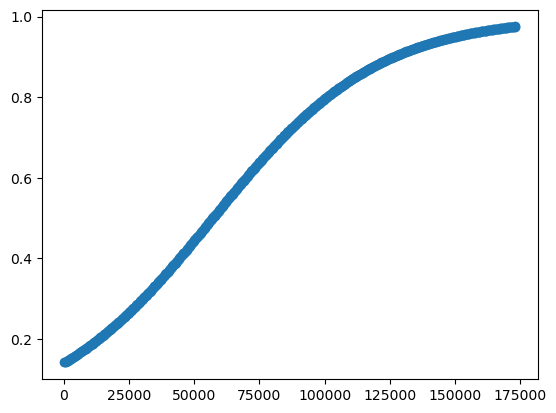

In [77]:
plt.scatter(x,logifunc(x,*param))

We create a new dataframe that will contain the values that curve fit optimizes.

In [78]:
fd_exp2 = fd_exp.copy(deep=True)

In [79]:
new_frame=[]
x = np.array(fd_exp2['Time'])

for col in fd_exp.columns[2:]:
    
    print(col)
    y=np.array(fd_exp[col])
    param, cov = optim.curve_fit(logifunc,x,y,p0=[65000,0.0001])
    new_frame.append([logifunc(item,param[0],param[1]) for item in x])
                     
new_frame[0]

A1
A2
A3
C1
C2
C3
E2
E3
G1
G2
G3


[0.2094749270838058,
 0.2104616841317788,
 0.2114518460946622,
 0.21244541301711004,
 0.21344238482318453,
 0.2144427613155313,
 0.21544654217455875,
 0.2164537269576224,
 0.21746431509821382,
 0.2184783059051541,
 0.21949569856179277,
 0.22051649212521193,
 0.2215406855254351,
 0.22256827756464237,
 0.2235992669163906,
 0.22463365212483963,
 0.2256714316039844,
 0.22671260363689302,
 0.22775716637495155,
 0.22880511783711466,
 0.22985645590916284,
 0.2309111783429671,
 0.23196928275575934,
 0.2330307666294112,
 0.23409562730971833,
 0.2351638620056939,
 0.23623546778886823,
 0.23731044159259657,
 0.23838878021137502,
 0.2394704803001638,
 0.24055553837371907,
 0.24164395080593312,
 0.24273571382918263,
 0.24383082353368624,
 0.24492927586687002,
 0.24603106663274238,
 0.24713619149127858,
 0.24824464595781315,
 0.24935642540244332,
 0.2504715250494408,
 0.25158993997667395,
 0.2527116651150397,
 0.25383669524790525,
 0.25496502501056073,
 0.2560966488896814,
 0.2572315612228009,
 0.25

In [80]:
for i in range(2,len(fd_exp.columns)):
    fd_exp2[fd_exp.columns[i]] = new_frame[i-2]
fd_exp2

,Time,T600,A1,A2,A3,C1,C2,C3,E2,E3,G1,G2,G3
0,275.0,30,0.209475,0.185635,0.199295,0.225807,0.233529,0.244009,0.200427,0.197915,0.141889,0.175539,0.125514
1,575.0,30,0.210462,0.186151,0.200308,0.226504,0.234283,0.244633,0.201118,0.198897,0.143051,0.176266,0.127248
2,875.0,30,0.211452,0.186668,0.201326,0.227203,0.235039,0.245259,0.201811,0.199883,0.144220,0.176996,0.129002
3,1175.0,30,0.212445,0.187186,0.202347,0.227903,0.235797,0.245885,0.202506,0.200872,0.145397,0.177728,0.130777
4,1475.0,30,0.213442,0.187705,0.203372,0.228605,0.236556,0.246512,0.203203,0.201865,0.146583,0.178463,0.132573
...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,171875.0,30,0.888399,0.615724,0.903392,0.740068,0.771951,0.690621,0.746700,0.894013,0.974375,0.789859,0.999127
572,172175.0,30.1,0.888987,0.616531,0.903944,0.740833,0.772692,0.691343,0.747514,0.894597,0.974612,0.790691,0.999140
573,172475.0,30,0.889573,0.617336,0.904493,0.741597,0.773430,0.692064,0.748327,0.895178,0.974846,0.791520,0.999154
574,172775.0,30,0.890156,0.618142,0.905039,0.742360,0.774167,0.692784,0.749137,0.895756,0.975078,0.792347,0.999167


We plot the logistic equations against time

In [81]:
fd_exp2.hvplot(kind='line',x='Time',y=fd.columns[2:],width=1000,height=600,title='Logistic Growth Vs Time')

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

We alter the column names to distinguish our new dataframe

In [82]:
fd_exp2.columns = fd_exp2.columns+'_fit'
fd_exp2.columns

Index(['Time_fit', 'T600_fit', 'A1_fit', 'A2_fit', 'A3_fit', 'C1_fit',
       'C2_fit', 'C3_fit', 'E2_fit', 'E3_fit', 'G1_fit', 'G2_fit', 'G3_fit'],
      dtype='object')

We plot it again with custom styling options

In [83]:
fd_exp2.hvplot(kind='line',x='Time_fit',y=fd_exp2.columns[2:],width=1000,height=600,line_dash='dashed')

:NdOverlay   [Variable]
   :Curve   [Time_fit]   (value)

We now concatenate (by reassigning) the two dataframes, one containing the averaged growth values and the other containing logistic values.

In [84]:
fd_exp3 = fd_exp.copy(deep=True)
for i in range(2,len(fd_exp2.columns)):
    fd_exp3[fd_exp2.columns[i]] = fd_exp2[fd_exp2.columns[i]]

fd_exp3.head()

,Time,T600,A1,A2,A3,C1,C2,C3,E2,E3,...,A2_fit,A3_fit,C1_fit,C2_fit,C3_fit,E2_fit,E3_fit,G1_fit,G2_fit,G3_fit
0,275.0,30,0.096,0.098,0.1,0.097,0.099,0.1,0.102,0.108,...,0.185635,0.199295,0.225807,0.233529,0.244009,0.200427,0.197915,0.141889,0.175539,0.125514
1,575.0,30,0.098,0.097,0.101,0.097,0.099,0.1,0.103,0.105,...,0.186151,0.200308,0.226504,0.234283,0.244633,0.201118,0.198897,0.143051,0.176266,0.127248
2,875.0,30,0.097,0.097,0.103,0.098,0.1,0.1,0.105,0.11,...,0.186668,0.201326,0.227203,0.235039,0.245259,0.201811,0.199883,0.144220,0.176996,0.129002
3,1175.0,30,0.096,0.1,0.104,0.098,0.1,0.101,0.104,0.119,...,0.187186,0.202347,0.227903,0.235797,0.245885,0.202506,0.200872,0.145397,0.177728,0.130777
4,1475.0,30,0.097,0.099,0.105,0.098,0.101,0.102,0.101,0.117,...,0.187705,0.203372,0.228605,0.236556,0.246512,0.203203,0.201865,0.146583,0.178463,0.132573


We plot all our data together, to be able to visualize a growth and it's optimal logistic fit together

In [85]:
plot_ref_1 = fd_exp3.hvplot(kind='line',x='Time',y=fd_exp3.columns[2:13],width=1000,height=600)
plot_ref_2 = fd_exp3.hvplot(kind='line',x='Time',y=fd_exp3.columns[13:],width=1000,height=600,line_dash='dashed')
plot_ref_3 = plot_ref_1*plot_ref_2
plot_ref_3.opts(title='Growth and logistic fit Vs Time')

:Overlay
   .NdOverlay.I  :NdOverlay   [Variable]
      :Curve   [Time]   (value)
   .NdOverlay.II :NdOverlay   [Variable]
      :Curve   [Time]   (value)